# Programming for Data Analytics Project 1

### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Importing data

In [35]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### 1.1 Exploring the data

In [34]:
df.shape

(5110, 12)

This dataset has 5110 rows and 12 columns, it is a 2 dimensional array in Numpy terms.

In [4]:
# Counting the number of people who suffered stroke (1) and who didn't (0)
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [5]:
# verview of the dataset for variable count and datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In this dataset there are 12 columns, the first of which is and int64 datatype for "id", which does not have any infomration content for this analysis, therefore can be considered insignificant.
There is a mix of datatypes in the columns/variable some are deemed numerical (int64, float64), others are categorical objects.
Columns "gender", "ever_married", "work type", "Residence_type" and "smoking_status" are identified as categorical data, which can be converted into numerical datatypes.

In [6]:
# Dropping the "id" column as it is irrelevant
df.drop(["id"], axis = 1, inplace=True)

# Showing the dataset w/o "id"
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# Statistical summary of numerical data:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The DataFrame.describe() command is meant to provide a statistical summary of all numerical data. 

The "bmi" column only includes 4909 datapoints, as opposed to all other columns with 5110 datapoints.
On review of empty/missing data the same can be confirmed by using the isna().sum or isnull().sum() methods.


In [8]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 null/na values within the "bmi" column. 
This is a significant number of lines and I would not suggest to have them dropped out of the dataset. It is possible to fill those blanks with the mean of all values in the bmi column.

In [10]:
# Reviewing the statistical summary of the "bmi" column.
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [11]:
# Filling the missing values with the mean of the bmi column:
df.fillna(df["bmi"].mean(), inplace=True)

In [12]:
# Reviewing the updated state of the bmi column.
df.bmi.describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [13]:
# Review again the dataframe for missing values:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are no more missing values in the dataset.

### 1.2 Visualizing data

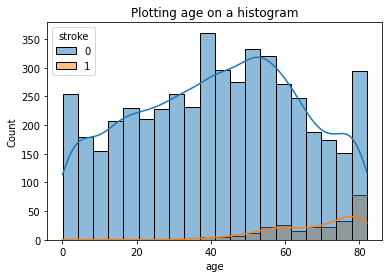

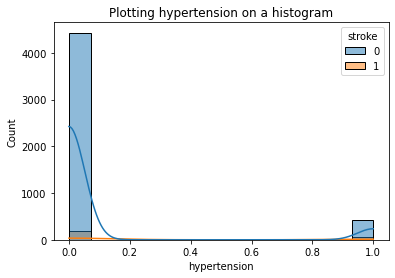

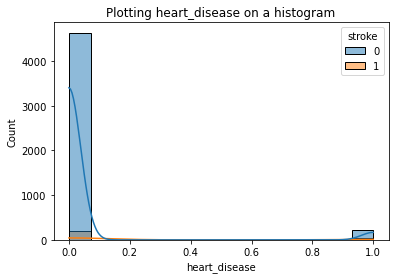

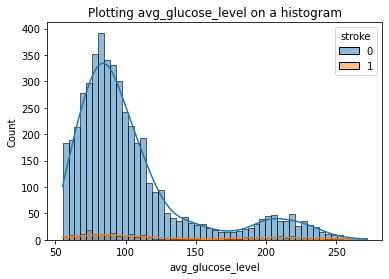

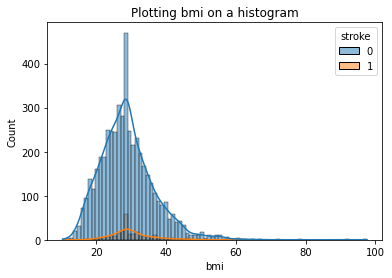

In [14]:
# Importing Seaborn for visualization
import seaborn as sns

# Plot each numerical variable on historgrams to drwa conclusion on the type of distribution:

for i in df.columns[1:-1]: # excluding the last column "stroke"
    if (df[i].dtype == "int64") or (df[i].dtype =="float64"):
        sns.histplot(data=df, x=i, kde=True, hue = df["stroke"])
        plt.title("Plotting {} on a histogram".format(i))
        plt.show()

Distribution of the datapoints vary significantly with bmi and avg_glucose_level more trending towards a lognormal distribution and age more towards a uniform distibution.

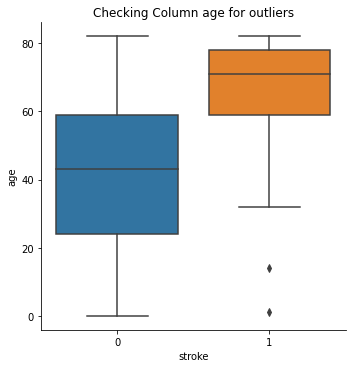

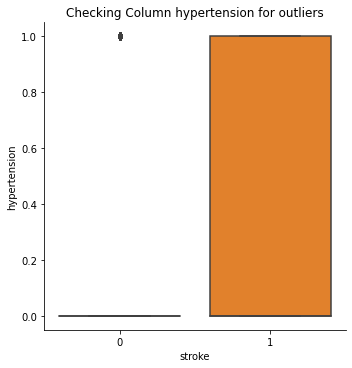

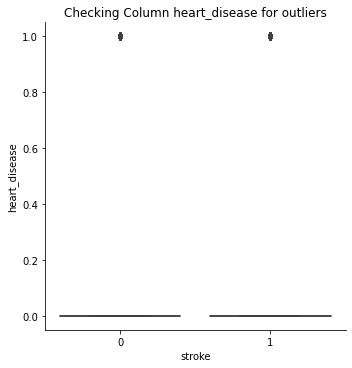

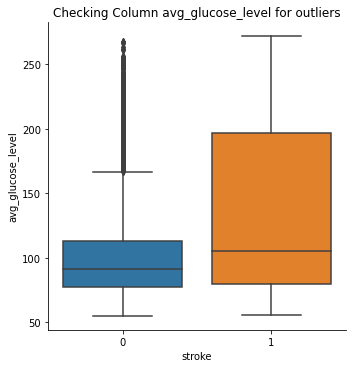

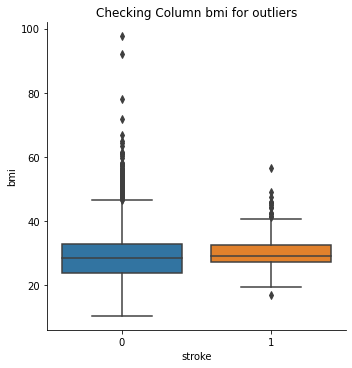

In [15]:
# Plotting numerical variable to check for outliers:

for i in df.columns[:-1]:
    if (df[i].dtype == "int64") or (df[i].dtype =="float64"):
        sns.catplot(data=df, x = "stroke", y = i, kind = "box")
        plt.title("Checking Column {} for outliers".format(i))
        plt.show()


Following datapoints can be considered for dropping from dataset for being outliers:
- "age" - "stroke" < 20 (despite data being potentially correct, these datapoints will be excluded)
- "bmi" - "no stroke" > 80 (excluding the two datapoints)

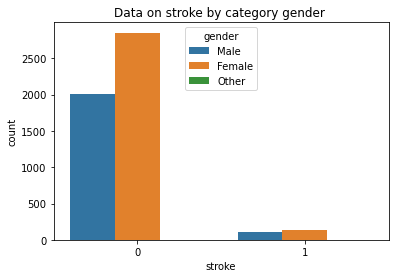

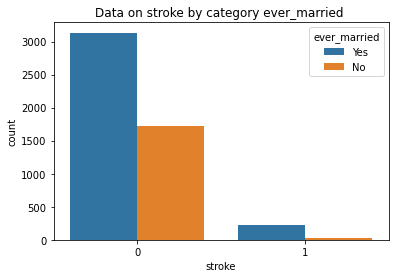

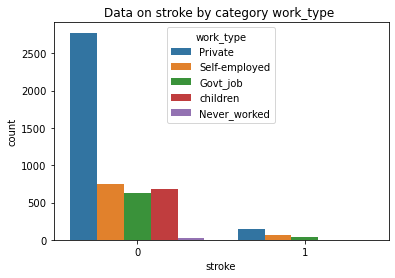

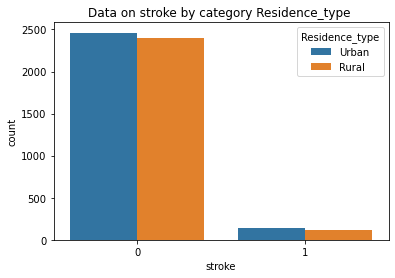

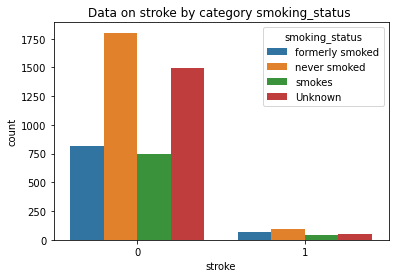

In [16]:
# Visualization of cases of stroke(1) vs no stroke (0) against categorical data: 

for i in df.columns[:]:
    if df[i].dtype == "object":
        sns.countplot(data = df, x = 'stroke', hue = i)
        plt.title("Data on stroke by category {} ".format(i))
        plt.show()

Barcharts show that the categorical variables do not significantly contribute/influence the occurrance of a stroke by themselves.

In [17]:
# Checking for correlation across the numerical variables
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


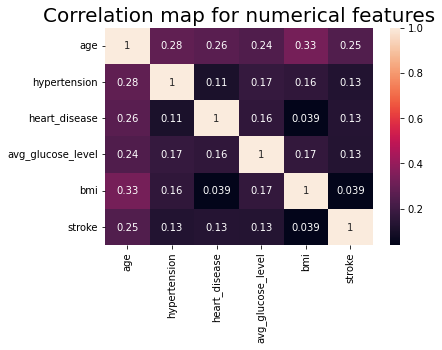

In [18]:
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation map for numerical features", fontsize = 20)
plt.show()

There is weak relationship between the occurrances of stroke and the included numerical variables in this dataset. Strong relationships are considered when the values are beyond the 0.8 mark, close to 1.0.

## 2. Preprocessing

### 2.1 Encoding
#### *Changing categorical values/features to integers*

In [19]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(handle_unknown = "error")
X = df[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]]
temp_df= one_hot_enc.fit_transform(X).toarray()
temp_df

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [20]:
one_hot_enc.categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [21]:
# Create new dataframe with the new columns and data type of integers
encoded_df = pd.DataFrame(columns = one_hot_enc.get_feature_names_out(), data=temp_df)
encoded_df = encoded_df.astype(int)
encoded_df

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [22]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [23]:
# Merging the two dataframes into one:

df_new = pd.concat([df, encoded_df], axis = 1)
df_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,...,0,1,0,0,0,1,0,1,0,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,...,0,0,1,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,...,0,1,0,0,1,0,0,0,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,...,0,1,0,0,0,1,0,0,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,...,0,0,1,0,1,0,0,0,1,0


In [24]:
# Dropping the columns with the original categorical features:
df_new.drop(["gender", "ever_married", "work_type", "Residence_type", "smoking_status"], axis = 1, inplace = True)
df_new.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


### 2.2 Scaling Data - Managing outliers

In [31]:
# Reviewing and dropping outlier rows for age and bmi
# For Age dropping datapoints for age <20 where stroke occurred:
display(df_new[(df_new["age"] < 20) & (df_new["stroke"] == 1)])

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes


In [32]:
df_new.drop(df_new[(df_new["age"] < 20) & (df_new["stroke"] == 1)].index, inplace = True)
df_new

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


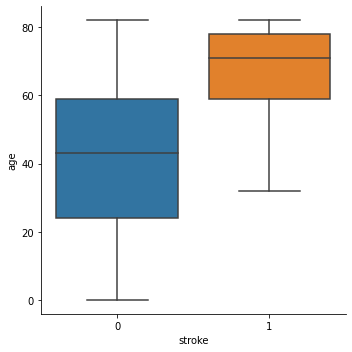

In [27]:
# Re-visualizing the age series to show removal of outliers
sns.catplot(data=df_new, x = "stroke", y = "age", kind = "box")

In [28]:
display(df_new[(df_new["bmi"] > 80) & (df_new["stroke"] == 0)]) 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2128,17.0,1,0,61.67,97.6,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4209,38.0,1,0,56.90,92.0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [29]:

df_new.drop(df_new[(df_new["bmi"] > 80) & (df_new["stroke"] == 0)].index, inplace = True)
df_new

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


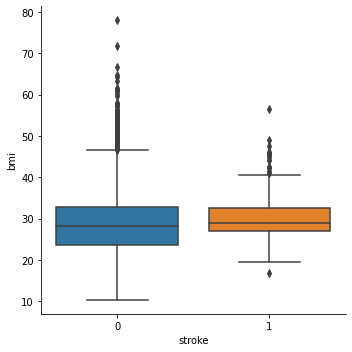

In [30]:
# Re-visualizing the bmi series to show removal of outliers beyond 80 years of age
sns.catplot(data=df_new, x = "stroke", y = "bmi", kind = "box")

In [37]:
# Check the shape of the new modified dataframe
df_new.shape

(5106, 22)

In [39]:
# Reset the index column to avoid missing indexes
df_new = df_new.reset_index(drop = True)
df_new

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,80.0,1,0,83.75,28.893237,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5102,81.0,0,0,125.20,40.000000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5103,35.0,0,0,82.99,30.600000,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5104,51.0,0,0,166.29,25.600000,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5106 non-null   float64
 1   hypertension                    5106 non-null   int64  
 2   heart_disease                   5106 non-null   int64  
 3   avg_glucose_level               5106 non-null   float64
 4   bmi                             5106 non-null   float64
 5   stroke                          5106 non-null   int64  
 6   gender_Female                   5106 non-null   int32  
 7   gender_Male                     5106 non-null   int32  
 8   gender_Other                    5106 non-null   int32  
 9   ever_married_No                 5106 non-null   int32  
 10  ever_married_Yes                5106 non-null   int32  
 11  work_type_Govt_job              5106 non-null   int32  
 12  work_type_Never_worked          51

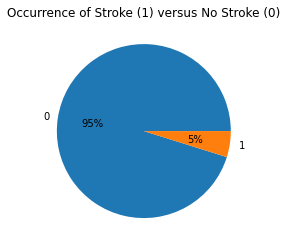

In [56]:
data = df_new["stroke"].value_counts()
labels = df_new["stroke"].value_counts().index
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.title("Occurrence of Stroke (1) versus No Stroke (0)")
plt.show()

## 3. Modelling

In [64]:
X = df_new.drop(["stroke"], axis=1)
y = df_new["stroke"]
y

0       1
1       1
2       1
3       1
4       1
       ..
5101    0
5102    0
5103    0
5104    0
5105    0
Name: stroke, Length: 5106, dtype: int64

In [65]:
X

,index,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,228.69,36.600000,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,1,61.0,0,0,202.21,28.893237,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,2,80.0,0,1,105.92,32.500000,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,3,49.0,0,0,171.23,34.400000,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,4,79.0,1,0,174.12,24.000000,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,5101,80.0,1,0,83.75,28.893237,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5102,5102,81.0,0,0,125.20,40.000000,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5103,5103,35.0,0,0,82.99,30.600000,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5104,5104,51.0,0,0,166.29,25.600000,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


# Conclusion

# References
References are included in the ReadMe.md file in the main project folder.

# License
This Notebook was released under GNU General Public License v3.0 license.

# End